In [4]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to my database
# Database connection parameters
conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()


In [5]:
# Query to retrieve UCLA offensive stats along with weather, altitude, and distance
query = """
SELECT date, raw_location, opponent, 
       passing_cmp, passing_att, completion_pct, passing_yds, passing_td, 
       rushing_att, rushing_yds, rushing_avg, rushing_td, total_plays, total_yards, avg_yds,
       pass_first_downs, rush_first_downs, first_down_pens, total_first_downs, 
       total_penalties, total_penalties_yds, total_fum, total_int, total_to,
       temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM UCLA_Offensive_Stats;
"""

ucla_data = pd.read_sql(query, conn)

# Display the first few rows of the data
ucla_data.head()



/var/folders/d0/gj8tfnxn3jd2gjx88tk4mp180000gn/T/ipykernel_59724/376439043.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ucla_data = pd.read_sql(query, conn)


,date,raw_location,opponent,passing_cmp,passing_att,completion_pct,passing_yds,passing_td,rushing_att,rushing_yds,...,total_penalties,total_penalties_yds,total_fum,total_int,total_to,temp_f,precipitation_in,windspeed_mph,altitude_m,distance_from
0,2022-10-22,@,Oregon,27,39,69.2,262,2,30,186,...,6,65,0,1,1,51.4,0.208,13.3,130.0,732.25
1,2022-10-29,H,Stanford,18,29,62.1,199,0,45,324,...,6,50,1,0,1,63.5,0.000,7.6,263.0,0.00
2,2022-11-05,@,Arizona State,13,20,65.0,169,2,42,402,...,6,75,1,1,2,58.0,0.000,8.1,366.0,377.52
3,2022-11-12,H,Arizona,26,39,66.7,245,1,37,219,...,4,23,1,0,1,58.2,0.000,5.3,263.0,0.00
4,2022-11-19,H,Southern California,23,38,60.5,309,4,37,204,...,6,35,2,3,5,60.9,0.000,2.6,263.0,0.00


In [18]:
# Starting off with some general descriptive stats
ucla_data.describe()


,passing_cmp,passing_att,completion_pct,passing_yds,passing_td,rushing_att,rushing_yds,rushing_avg,rushing_td,total_plays,...,total_penalties,total_penalties_yds,total_fum,total_int,total_to,temp_f,precipitation_in,windspeed_mph,altitude_m,distance_from
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,21.353383,34.285714,62.722556,263.563910,1.909774,38.541353,177.849624,4.533083,1.947368,72.827068,...,7.330827,64.045113,0.676692,0.872180,1.548872,64.845865,0.016782,9.292481,370.187970,293.118271
std,6.616320,10.161999,10.154090,90.762957,1.164231,9.632262,85.058135,1.807883,1.478717,10.895865,...,2.757144,25.892805,0.830743,0.987908,1.328397,10.516772,0.062871,4.172541,407.786656,434.614823
min,8.000000,15.000000,30.800000,64.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,48.000000,...,2.000000,10.000000,0.000000,0.000000,0.000000,32.400000,0.000000,2.600000,4.000000,0.000000
25%,17.000000,26.000000,56.300000,195.000000,1.000000,32.000000,117.000000,3.500000,1.000000,64.000000,...,5.000000,45.000000,0.000000,0.000000,1.000000,58.800000,0.000000,6.300000,202.000000,0.000000
50%,21.000000,34.000000,62.100000,258.000000,2.000000,38.000000,180.000000,4.500000,2.000000,73.000000,...,7.000000,63.000000,0.000000,1.000000,1.000000,64.800000,0.000000,8.200000,263.000000,0.000000
75%,26.000000,40.000000,70.000000,315.000000,3.000000,45.000000,225.000000,5.600000,3.000000,80.000000,...,9.000000,80.000000,1.000000,1.000000,2.000000,72.300000,0.000000,11.200000,263.000000,452.590000
max,40.000000,71.000000,86.700000,507.000000,5.000000,64.000000,404.000000,10.400000,6.000000,98.000000,...,15.000000,143.000000,3.000000,4.000000,5.000000,92.200000,0.352000,25.800000,1655.000000,2235.490000


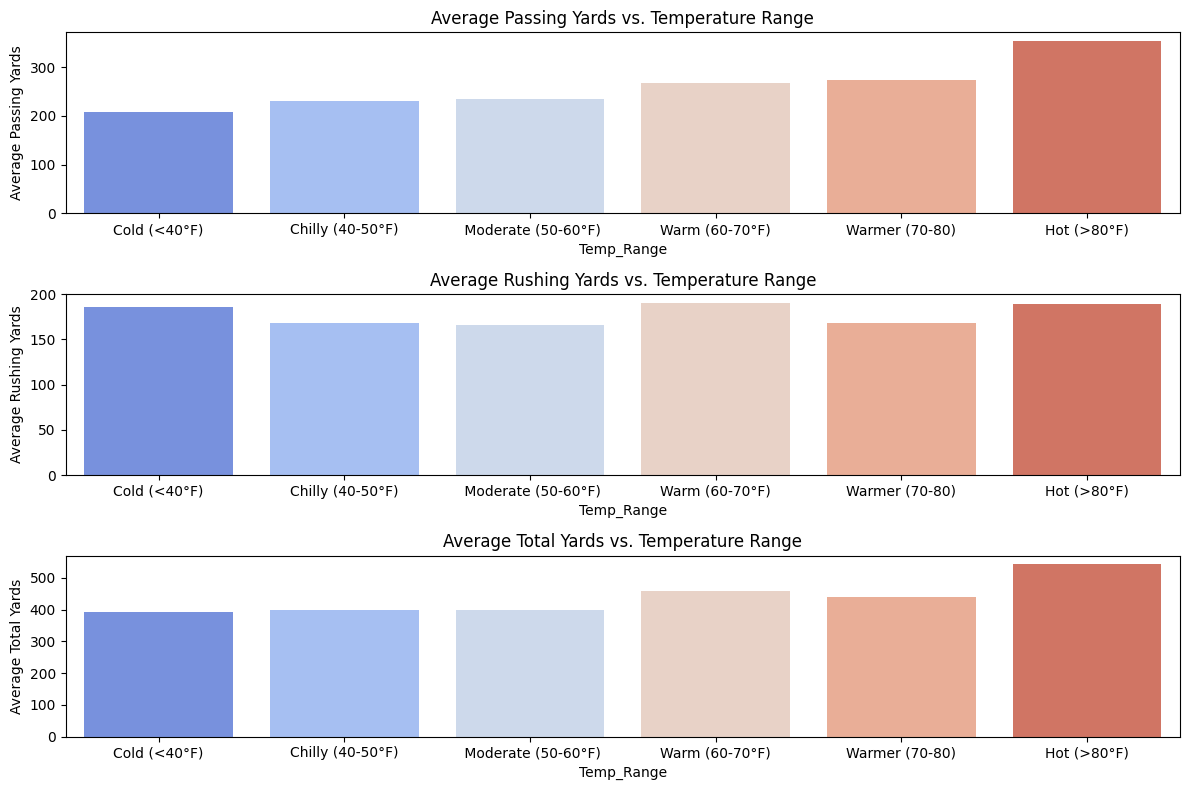

In [7]:
# Create temperature bins
temp_bins = [0, 40, 50, 60, 70, 80, 120]  # Adjust these ranges as needed
temp_labels = ['Cold (<40°F)', 'Chilly (40-50°F)', ' Moderate (50-60°F)', 'Warm (60-70°F)', 'Warmer (70-80)', 'Hot (>80°F)']
ucla_data['Temp_Range'] = pd.cut(ucla_data['temp_f'], bins=temp_bins, labels=temp_labels, right=False)
ucla_data['Temp_Range'] = pd.cut(ucla_data['temp_f'], bins=temp_bins, labels=temp_labels, right=False)

# Group by temperature range and calculate mean performance metrics
temp_grouped = ucla_data.groupby('Temp_Range', observed=True).agg({
    'passing_yds': 'mean',
    'rushing_yds': 'mean',
    'total_yards': 'mean'
}).reset_index()

# Plotting the data with color palette
plt.figure(figsize=(12, 8))

# Passing Yards
plt.subplot(3, 1, 1)
sns.barplot(x='Temp_Range', y='passing_yds', data=temp_grouped, hue='Temp_Range', palette='coolwarm', legend=False)
plt.title('Average Passing Yards vs. Temperature Range')
plt.ylabel('Average Passing Yards')

# Rushing Yards
plt.subplot(3, 1, 2)
sns.barplot(x='Temp_Range', y='rushing_yds', data=temp_grouped, hue='Temp_Range', palette='coolwarm', legend=False)
plt.title('Average Rushing Yards vs. Temperature Range')
plt.ylabel('Average Rushing Yards')

# Total Yards
plt.subplot(3, 1, 3)
sns.barplot(x='Temp_Range', y='total_yards', data=temp_grouped, hue='Temp_Range', palette='coolwarm', legend=False)
plt.title('Average Total Yards vs. Temperature Range')
plt.ylabel('Average Total Yards')

plt.tight_layout()
plt.show()


In [25]:
# Check the column names in your DataFrame
print(ucla_data.columns)


Index(['date', 'raw_location', 'opponent', 'passing_cmp', 'passing_att',
       'completion_pct', 'passing_yds', 'passing_td', 'rushing_att',
       'rushing_yds', 'rushing_avg', 'rushing_td', 'total_plays',
       'total_yards', 'avg_yds', 'pass_first_downs', 'rush_first_downs',
       'first_down_pens', 'total_first_downs', 'total_penalties',
       'total_penalties_yds', 'total_fum', 'total_int', 'total_to', 'temp_f',
       'precipitation_in', 'windspeed_mph', 'altitude_m', 'distance_from'],
      dtype='object')


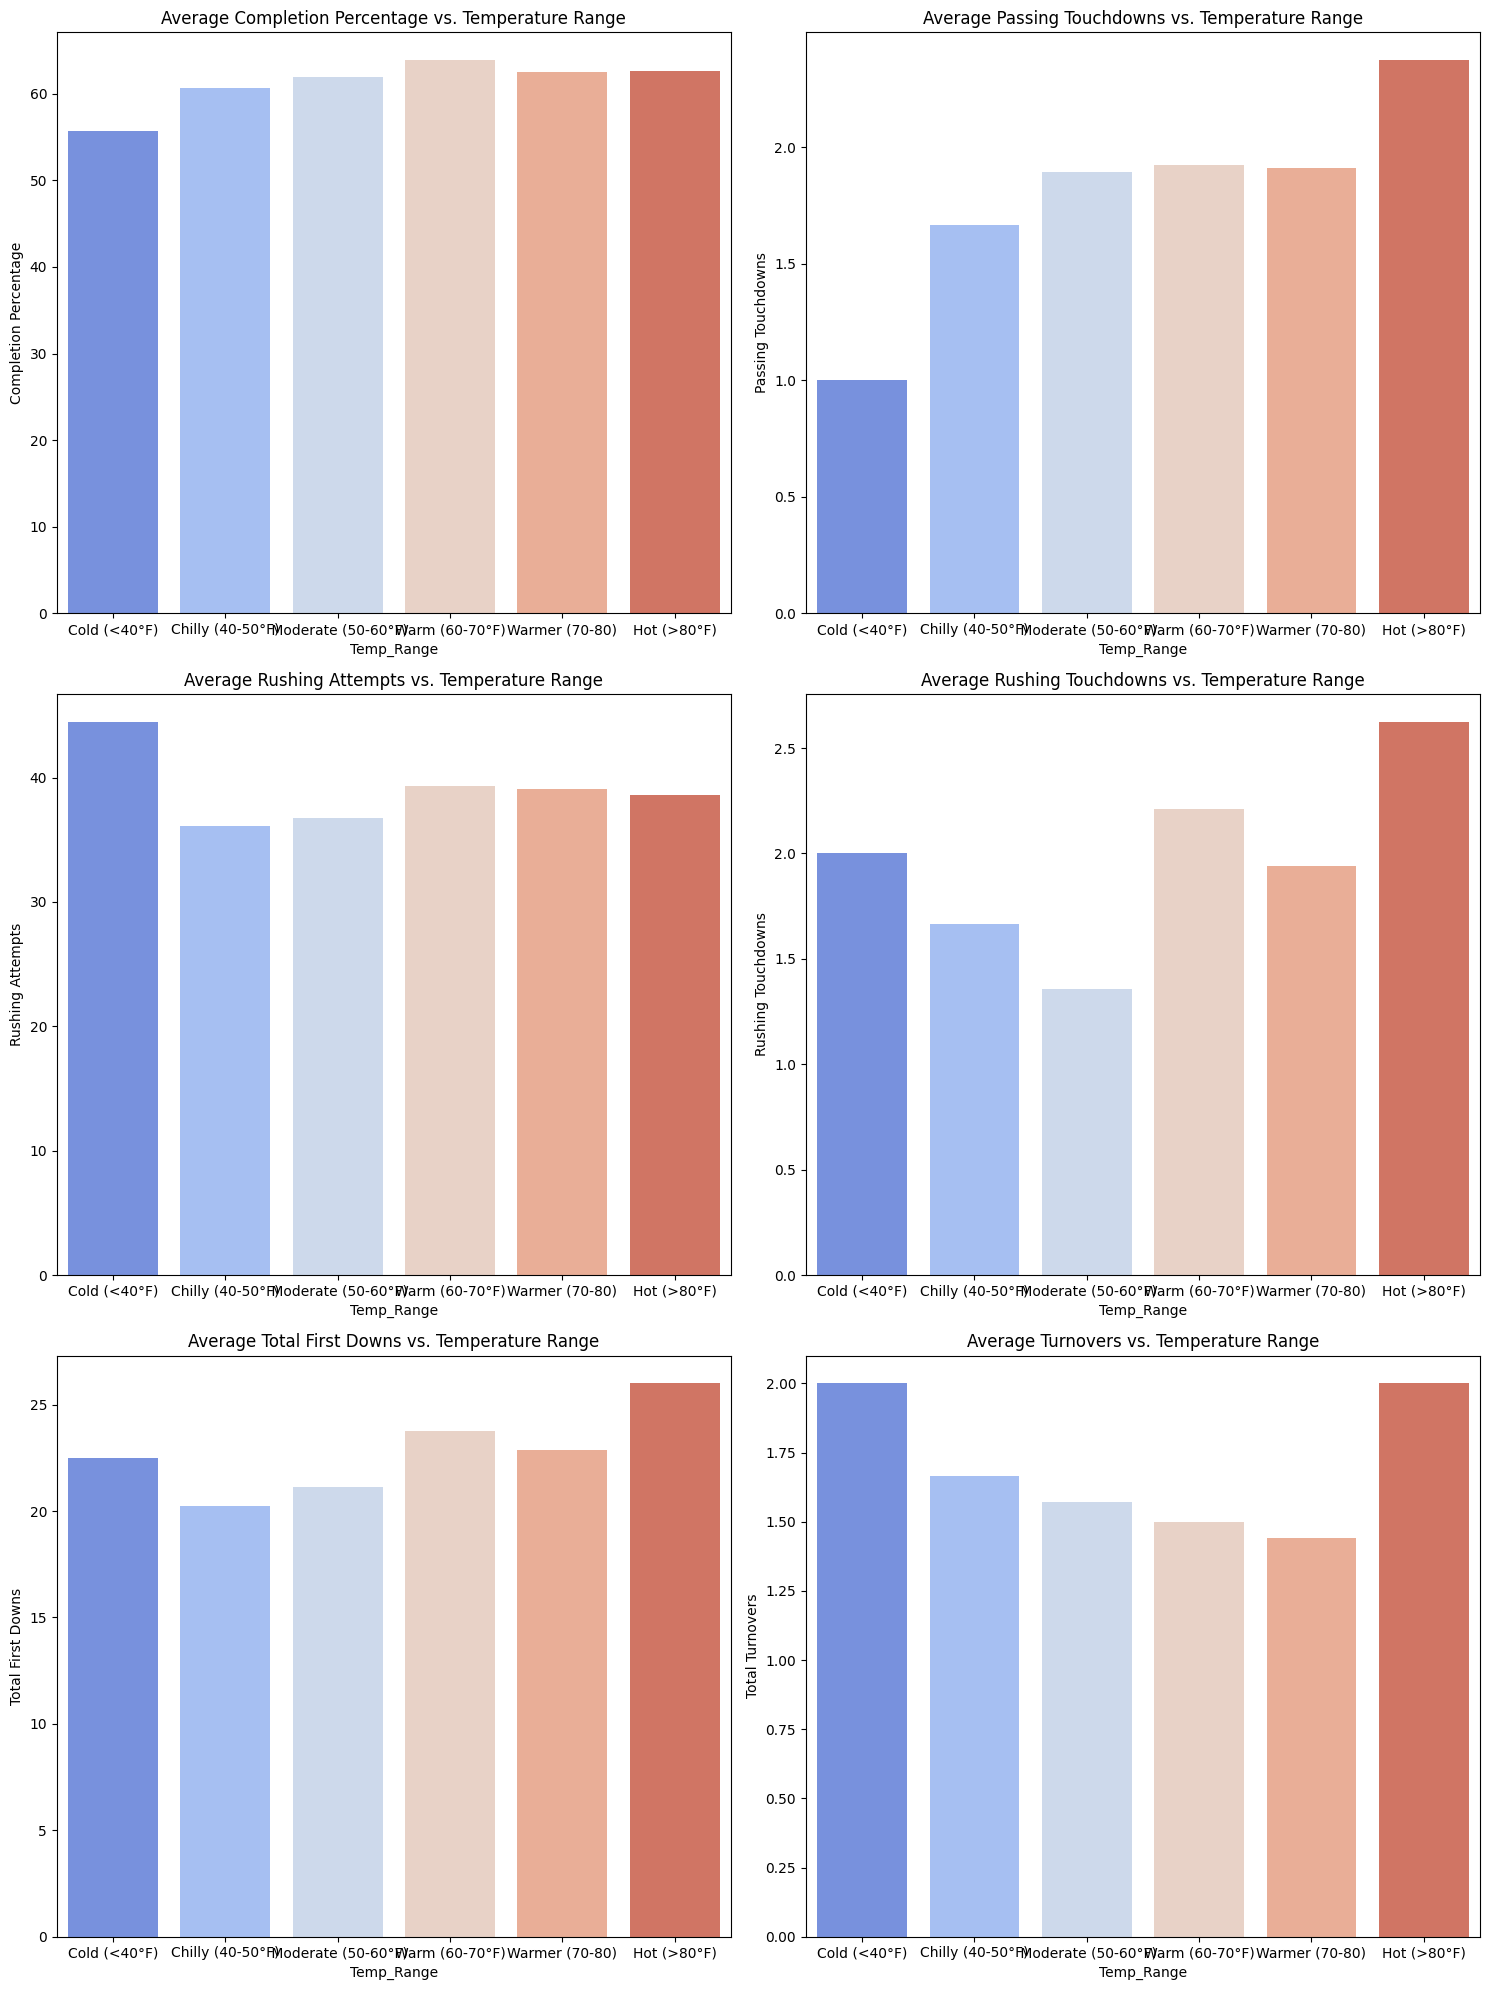

In [9]:
# Group by temperature range and calculate mean performance metrics
temp_grouped = ucla_data.groupby('Temp_Range', observed=True).agg({
    'completion_pct': 'mean',
    'passing_td': 'mean',
    'rushing_att': 'mean',
    'rushing_td': 'mean',
    'total_first_downs': 'mean',
    'total_to': 'mean'  # total_to includes both fumbles and interceptions
}).reset_index()

# Plotting the data
plt.figure(figsize=(15, 20))

# Completion Percentage
plt.subplot(3, 2, 1)
sns.barplot(x='Temp_Range', y='completion_pct', hue='Temp_Range', data=temp_grouped, palette='coolwarm', dodge=False)
plt.title('Average Completion Percentage vs. Temperature Range')
plt.ylabel('Completion Percentage')
plt.legend([],[], frameon=False)

# Passing Touchdowns
plt.subplot(3, 2, 2)
sns.barplot(x='Temp_Range', y='passing_td', hue='Temp_Range', data=temp_grouped, palette='coolwarm', dodge=False)
plt.title('Average Passing Touchdowns vs. Temperature Range')
plt.ylabel('Passing Touchdowns')
plt.legend([],[], frameon=False)

# Rushing Attempts
plt.subplot(3, 2, 3)
sns.barplot(x='Temp_Range', y='rushing_att', hue='Temp_Range', data=temp_grouped, palette='coolwarm', dodge=False)
plt.title('Average Rushing Attempts vs. Temperature Range')
plt.ylabel('Rushing Attempts')
plt.legend([],[], frameon=False)

# Rushing Touchdowns
plt.subplot(3, 2, 4)
sns.barplot(x='Temp_Range', y='rushing_td', hue='Temp_Range', data=temp_grouped, palette='coolwarm', dodge=False)
plt.title('Average Rushing Touchdowns vs. Temperature Range')
plt.ylabel('Rushing Touchdowns')
plt.legend([],[], frameon=False)

# Total First Downs
plt.subplot(3, 2, 5)
sns.barplot(x='Temp_Range', y='total_first_downs', hue='Temp_Range', data=temp_grouped, palette='coolwarm', dodge=False)
plt.title('Average Total First Downs vs. Temperature Range')
plt.ylabel('Total First Downs')
plt.legend([],[], frameon=False)

# Total Turnovers
plt.subplot(3, 2, 6)
sns.barplot(x='Temp_Range', y='total_to', hue='Temp_Range', data=temp_grouped, palette='coolwarm', dodge=False)
plt.title('Average Turnovers vs. Temperature Range')
plt.ylabel('Total Turnovers')
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()



In [10]:
# Calculate run-pass ratio/percentage
ucla_data['run_percentage'] = (ucla_data['rushing_att'] / ucla_data['total_plays']) * 100
ucla_data['pass_percentage'] = (ucla_data['passing_att'] / ucla_data['total_plays']) * 100


# Group by temperature range and calculate mean run and pass percentages
temp_grouped_ratio = ucla_data.groupby('Temp_Range', observed=True).agg({
    'run_percentage': 'mean',
    'pass_percentage': 'mean'
}).reset_index()

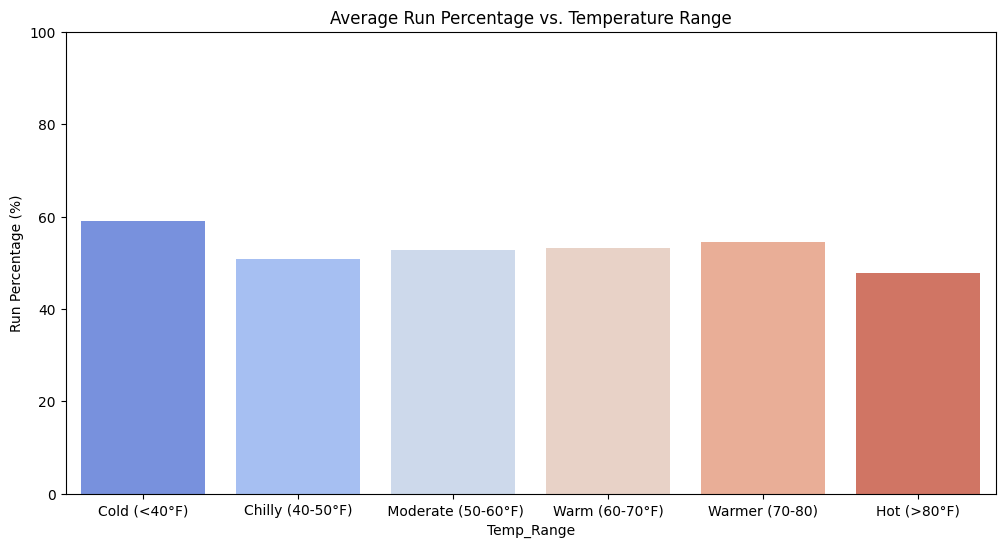

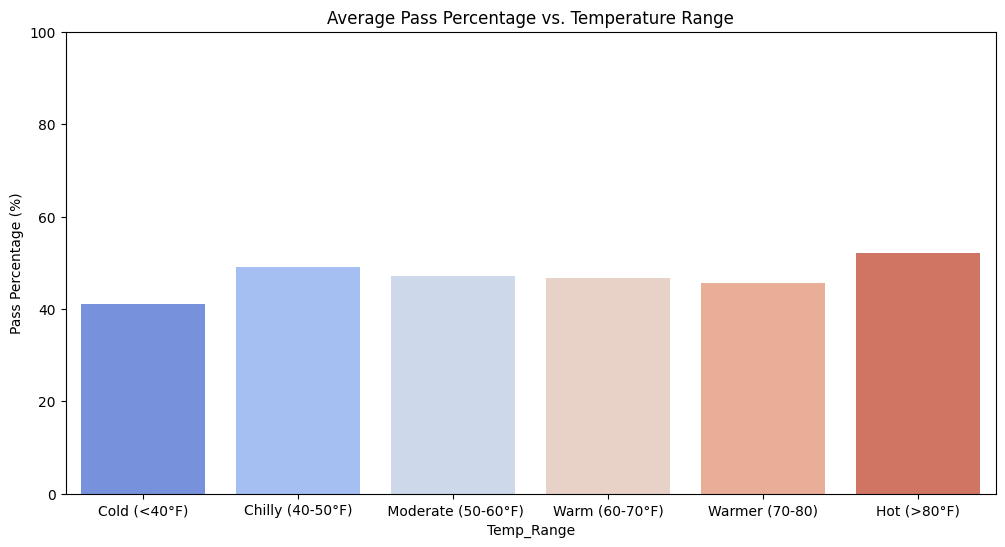

In [11]:
# Plotting the run percentage
plt.figure(figsize=(12, 6))

sns.barplot(x='Temp_Range', y='run_percentage', hue='Temp_Range', data=temp_grouped_ratio, palette='coolwarm', dodge=False)
plt.title('Average Run Percentage vs. Temperature Range')
plt.ylabel('Run Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limits to avoid bars hitting the top
plt.legend([],[], frameon=False)
plt.show()

# Plotting the pass percentage
plt.figure(figsize=(12, 6))

sns.barplot(x='Temp_Range', y='pass_percentage', hue='Temp_Range', data=temp_grouped_ratio, palette='coolwarm', dodge=False)
plt.title('Average Pass Percentage vs. Temperature Range')
plt.ylabel('Pass Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limits to avoid bars hitting the top
plt.legend([],[], frameon=False)
plt.show()



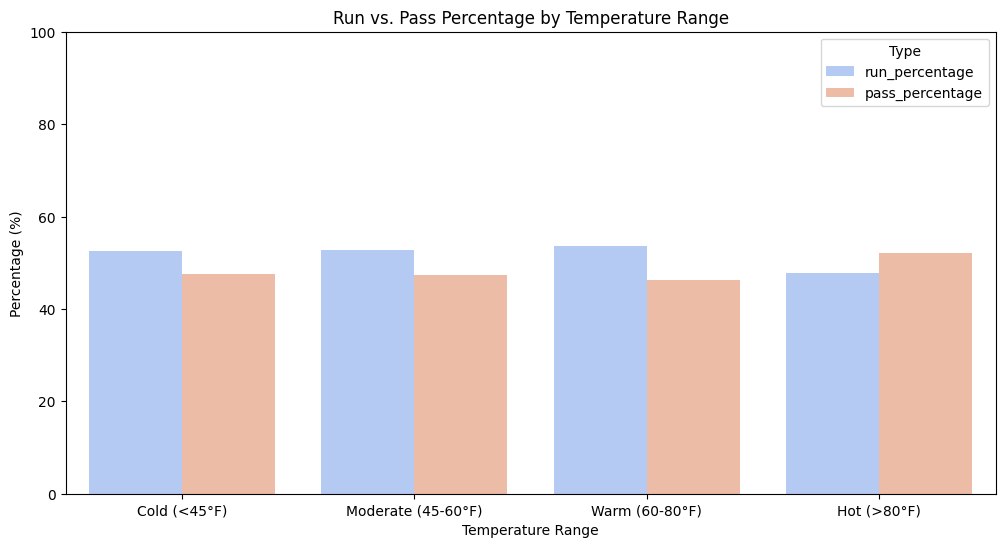

In [12]:
temp_grouped_ratio_melted = pd.melt(temp_grouped_ratio, id_vars='Temp_Range', value_vars=['run_percentage', 'pass_percentage'],
                                    var_name='Type', value_name='Percentage')

# Plotting the combined bar chart
plt.figure(figsize=(12, 6))

sns.barplot(x='Temp_Range', y='Percentage', hue='Type', data=temp_grouped_ratio_melted, palette='coolwarm')
plt.title('Run vs. Pass Percentage by Temperature Range')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limits to avoid bars hitting the top
plt.xlabel('Temperature Range')
plt.show()